In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from utils import *

path_data = '/Users/dariozappala/Library/CloudStorage/Dropbox/università/RTD-A/progetti/dati/Crunchbase/'
path_images = './immagini/'

# Lettura

### Jobs

In [2]:
%%time
df_jobs = pd.read_csv(path_data + 'jobs.csv')
clean_jobs(df_jobs)

CPU times: user 12.9 s, sys: 2.11 s, total: 15 s
Wall time: 15.8 s


### Organizations

In [3]:
%%time
df_organizations = pd.read_csv(path_data + 'organizations.csv')
clean_organizations(df_organizations)

CPU times: user 24.3 s, sys: 9.68 s, total: 34 s
Wall time: 37.8 s


# Evoluzione temporale

## Selezione di compagnie/regioni

#### Un'area

In [39]:
str_selection = 'Europe'
ser_selection = (df_organizations['area'] == str_selection)

#### Un paese

In [22]:
str_selection = 'ITA'
ser_selection = (df_organizations['country_code'] == str_selection)

#### Una città

In [ ]:
str_selection = 'Milan'
ser_selection = (df_organizations['country_code'] == 'ITA') & (df_organizations['city'] == str_selection)

#### Una compagnia specifica

In [6]:
str_selection = 'Airbnb'

ser_selection = df_organizations['name'].str.contains(str_selection, case = False, na = False)

df_organizations_sel = df_organizations.loc[
    df_organizations['name'].str.contains(str_selection, case = False, na = False),
    ['uuid', 'name', 'rank', 'legal_name', 'city', 'country_code', 'area', 'short_description', 'founded_on']
].sort_values('rank')

display(df_organizations_sel)

uuid = df_organizations_sel.iloc[0]['uuid']
ser_selection = (df_organizations['uuid'] == uuid)
df_organizations_sel.iloc[[0]][['uuid', 'name', 'rank', 'legal_name', 'city', 'country_code', 'area', 'short_description', 'founded_on']]

,uuid,name,rank,legal_name,city,country_code,area,short_description,founded_on
7143,bcb617c3-9e43-d5b0-1d14-82b795f2642f,Airbnb,532.0,"Airbnb, Inc.",San Francisco,USA,USA,Airbnb is an online community marketplace for ...,2008-08-11
771657,e3c25fff-0cbb-4d5b-9b59-bfc221ea1a1a,Airbnb for Work,360283.0,NaN,San Francisco,USA,USA,Airbnb for Work is a Business Travel Managemen...,2008-01-01
1350697,94916320-10a5-48fb-a849-6a042cbd8437,Fairbnb.coop,453880.0,NaN,Bologna,ITA,Europe,Fairbnb.coop is an online platform that offers...,2018-01-01
1023613,8f12c62b-c3d2-4150-b561-937ff6510269,Airbnbase,578005.0,Airbnbase,NaN,NaN,None,Community-powered Airbnb help hub,2020-02-01
1183933,ac8ba33d-138f-4889-a709-8124e1f69064,Airbnbutler,1251663.0,NaN,Amsterdam,NLD,Europe,Airbnbutler is an Airbnb vacation rentals mana...,2015-11-01
268115,8e6f4d91-8741-f2d6-6583-8e1815e3cd28,Inside Airbnb New York City,1400998.0,NaN,New York,USA,USA,"New York City is a city of renters, yet despit...",2016-01-01
653500,60b43b30-e195-4b8c-bd92-6c0402aea10f,Airbnb China,1856670.0,NaN,NaN,NaN,None,Airbnb China,NaT
1950136,833f47b7-8131-48ce-ac2f-1d699f4b58b3,Airbnb Rentals Yucca Valley,1952156.0,Airbnb Rentals Yucca Valley,NaN,NaN,None,Avail The Best Services For Yucca Valley Vacat...,NaT
653570,6d1b8295-847b-4091-a889-d6ed6c57129c,Airbnb Management Service,2564289.0,NaN,NaN,NaN,None,"Real Estate, Property Management, PropTech",2017-01-01
2729137,c86ca914-42ab-4652-b26c-f578077d6d3f,Airbnb Virtual Assistant,2635008.0,bnbvirtualassistant.com,NaN,NaN,None,Airbnb Virtual Assistant as a service - Achiev...,2022-01-01


,uuid,name,rank,legal_name,city,country_code,area,short_description,founded_on
7143,bcb617c3-9e43-d5b0-1d14-82b795f2642f,Airbnb,532.0,"Airbnb, Inc.",San Francisco,USA,USA,Airbnb is an online community marketplace for ...,2008-08-11


## Costruzione dati

In [40]:
df_organizations_sel = df_organizations.loc[
    ser_selection,
    ['uuid', 'name', 'rank', 'legal_name', 'city', 'country_code', 'area', 'short_description', 'founded_on', 'category_groups_list']
]
print('Selected companies:', df_organizations_sel.shape[0])

df_jobs_sel = (
    df_organizations_sel[['uuid', 'name', 'category_groups_list']].rename(columns = {'uuid': 'org_uuid', 'name': 'org_name', 'category_groups_list': 'sectors'})
    .merge(
        df_jobs.loc[~df_jobs['started_on'].isna(), ['org_uuid', 'person_uuid', 'started_on', 'ended_on', 'job_type']],
        on = 'org_uuid', how = 'inner'
    )
)
print('Selected jobs:', df_jobs_sel.shape[0])
df_jobs_sel.head()

Selected companies: 898531
Selected jobs: 425218


,org_uuid,org_name,sectors,person_uuid,started_on,ended_on,job_type
0,2c8502f9-cf1a-7b91-9f10-7976a1bf753a,Mangrove Capital Partners,"Financial Services,Internet Services,Lending a...",4c3a92ca-7574-1306-a2a2-91dfb70e3bbe,2000-01-01,NaT,founder
1,2c8502f9-cf1a-7b91-9f10-7976a1bf753a,Mangrove Capital Partners,"Financial Services,Internet Services,Lending a...",c8886ad6-0c43-9d0e-21c4-e2b3027ae85a,2007-10-01,2018-10-01,executive
2,2c8502f9-cf1a-7b91-9f10-7976a1bf753a,Mangrove Capital Partners,"Financial Services,Internet Services,Lending a...",891f5330-9186-f22f-97a6-389e02f793a8,2000-03-01,NaT,executive
3,2c8502f9-cf1a-7b91-9f10-7976a1bf753a,Mangrove Capital Partners,"Financial Services,Internet Services,Lending a...",10ec809f-7167-b25d-5453-7b9f4b2b5a44,2013-09-20,NaT,employee
4,2c8502f9-cf1a-7b91-9f10-7976a1bf753a,Mangrove Capital Partners,"Financial Services,Internet Services,Lending a...",4c3a92ca-7574-1306-a2a2-91dfb70e3bbe,2000-01-01,NaT,board_member


## Lavoratori e ruoli

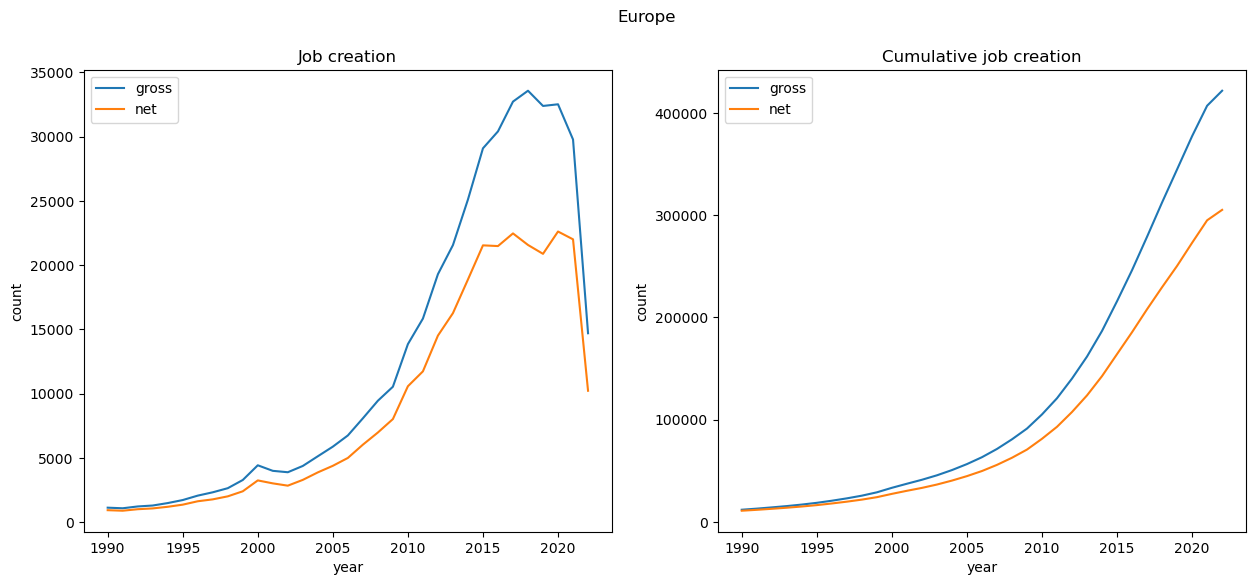

In [41]:
df_stats_start = df_jobs_sel.loc[~df_jobs_sel['started_on'].isna(), ['started_on', 'job_type']]
cols_jobs_start = df_stats_start['job_type'].unique()
cols_jobs_start.sort()
cols_jobs_start
df_stats_start['started_on'] = df_stats_start['started_on'].dt.year
df_stats_start['count'] = 1

df_stats_start = (
    df_stats_start
    .groupby(['started_on', 'job_type']).count().reset_index()
    .pivot_table(index = 'started_on', columns = 'job_type', values = 'count', aggfunc = 'sum', fill_value = 0)
    .rename_axis(None, axis = 1)
)

df_stats_end = df_jobs_sel.loc[~df_jobs_sel['ended_on'].isna(), ['ended_on', 'job_type']]
df_stats_end['ended_on'] = df_stats_end['ended_on'].dt.year
df_stats_end['count'] = 1

df_stats_end = (
    df_stats_end
    .groupby(['ended_on', 'job_type']).count().reset_index()
    .pivot_table(index = 'ended_on', columns = 'job_type', values = 'count', aggfunc = 'sum', fill_value = 0)
    .rename_axis(None, axis = 1)
)

df_stats_net = df_stats_start.sub(df_stats_end, fill_value = 0).astype(int)

df_stats_start['total'] = df_stats_start.sum(axis = 1)
df_stats_start['cumulative'] = df_stats_start['total'].cumsum()
df_stats_net['total'] = df_stats_net.sum(axis = 1)
df_stats_net['cumulative'] = df_stats_net['total'].cumsum()

### Plot ###

year_first = max(1990, df_stats_net.index.values.min())
year_last = min(2022, df_stats_net.index.values.max())

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 6))

data_plot = df_stats_start.loc[year_first:year_last, 'total']
axes[0].plot(data_plot.index, data_plot, label = 'gross')
data_plot = df_stats_net.loc[year_first:year_last, 'total']
axes[0].plot(data_plot.index, data_plot, label = 'net')
#axes[0].set_xlim(year_first, year_last)
axes[0].set_xlabel('year')
axes[0].set_ylabel('count')
axes[0].set_title('Job creation')
axes[0].legend()

data_plot = df_stats_start.loc[year_first:year_last, 'cumulative']
axes[1].plot(data_plot.index, data_plot, label = 'gross')
data_plot = df_stats_net.loc[year_first:year_last, 'cumulative']
axes[1].plot(data_plot.index, data_plot, label = 'net')
#axes[1].set_xlim(year_first, year_last)
axes[1].set_xlabel('year')
axes[1].set_ylabel('count')
axes[1].set_title('Cumulative job creation')
axes[1].legend()

fig.suptitle(str_selection)

plt.show()

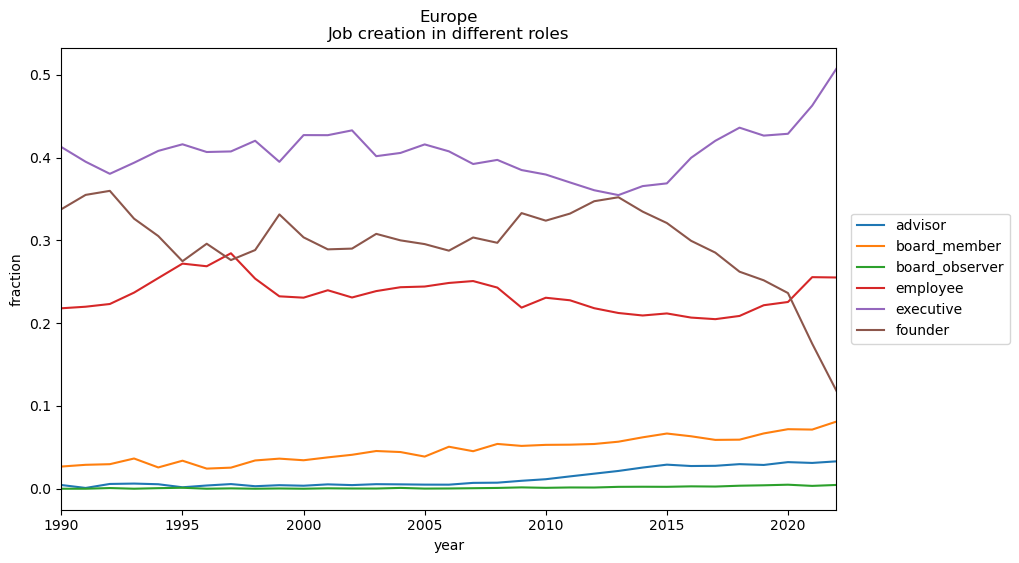

In [42]:
df_stats_roles_start = df_stats_start[cols_jobs_start].div(df_stats_start[cols_jobs_start].sum(axis = 1), axis = 0)

year_first = max(1990, df_stats_roles_start.index.values.min())
year_last = min(2022, df_stats_roles_start.index.values.max())

fig, ax = plt.subplots(figsize = (10, 6))

data_plot = df_stats_roles_start.loc[year_first:year_last]
for col in data_plot.columns:
    ax.plot(data_plot[col], label = col)

ax.set_xlim(year_first, year_last)
ax.set_xlabel('year')
ax.set_ylabel('fraction')
ax.set_title(str_selection + '\nJob creation in different roles')
ax.legend(loc = 'center left', bbox_to_anchor = (1.01, 0.5))
plt.show()

## Settori di mercato

In [14]:
df_jobs_sel_2 = df_jobs_sel.loc[~df_jobs_sel['sectors'].isna()]

df_dummy = df_jobs_sel_2['sectors'].str.get_dummies(sep = ',')
sectors_numbers = df_dummy.sum(axis = 0).sort_values(ascending = False)
#print(sectors_numbers)
cols_sectors_sel = sectors_numbers.index[:10].sort_values().tolist()

print('Market sectors:', df_dummy.shape[1])
print('Selected:', len(cols_sectors_sel))
print(cols_sectors_sel)

Market sectors: 47
Selected: 10
['Financial Services', 'Hardware', 'Information Technology', 'Internet Services', 'Media and Entertainment', 'Other', 'Professional Services', 'Sales and Marketing', 'Science and Engineering', 'Software']


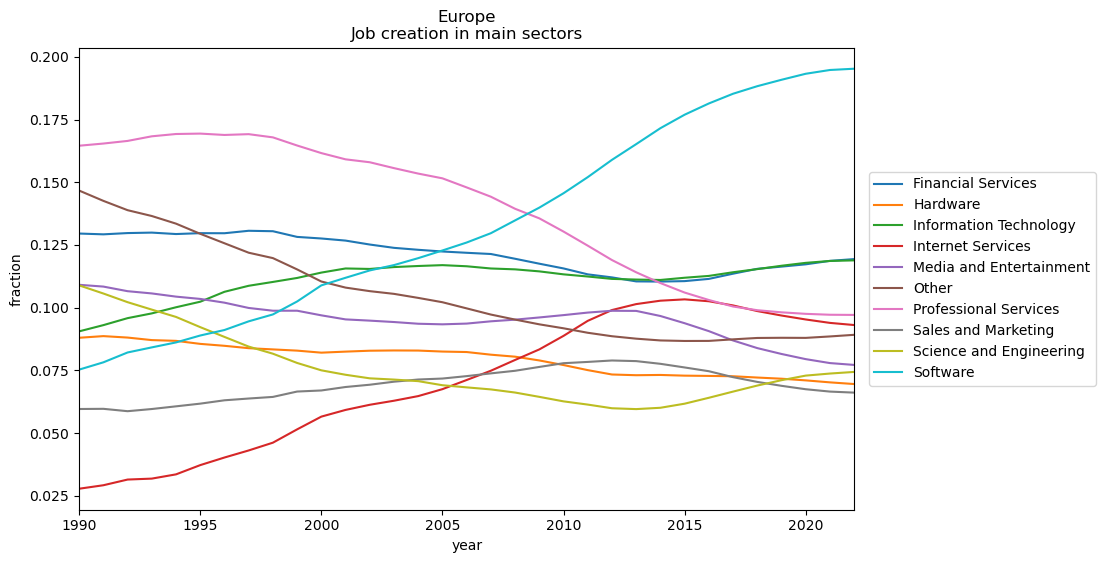

In [15]:
df_stats_start = df_dummy[cols_sectors_sel].groupby(df_jobs_sel_2['started_on'].dt.year)[cols_sectors_sel].sum()
df_stats_start_cumul = df_stats_start.cumsum()
df_stats_start_cumul_fractions = df_stats_start_cumul.div(df_stats_start_cumul.sum(axis = 1), axis = 0)

rows_sel = ~df_jobs_sel_2['ended_on'].isna()
df_stats_end = df_dummy.loc[rows_sel, cols_sectors_sel].groupby(df_jobs_sel_2.loc[rows_sel, 'ended_on'].dt.year)[cols_sectors_sel].sum()

df_stats_net = df_stats_start.sub(df_stats_end, fill_value = 0).astype(int)

df_stats_net_cumul = df_stats_net.cumsum()
df_stats_net_cumul_fractions = df_stats_net_cumul.div(df_stats_net_cumul.sum(axis = 1), axis = 0)

### Plot ###

year_first = max(1990, df_stats_start_cumul_fractions.index.values.min())
year_last = min(2022, df_stats_start_cumul_fractions.index.values.max())

fig, ax = plt.subplots(figsize = (10, 6))

data_plot = df_stats_start_cumul_fractions.loc[year_first:year_last]
for col in data_plot.columns:
    ax.plot(data_plot[col], label = col)

ax.set_xlim(year_first, year_last)
ax.set_xlabel('year')
ax.set_ylabel('fraction')
ax.set_title(str_selection + '\nJob creation in main sectors')
ax.legend(loc = 'center left', bbox_to_anchor = (1.01, 0.5))
plt.show()

# N. compagnie distinte nella carriera di ciascun lavoratore

In [16]:
df_stats_n_companies = (
    df_jobs.loc[~df_jobs['org_uuid'].isna(), ['person_uuid', 'org_uuid']]
    .groupby('person_uuid').nunique()
    .rename(columns = {'org_uuid': 'different companies'})
    .assign(count = 1)
).groupby('different companies').sum()

df_stats_n_companies['probability'] = df_stats_n_companies['count'] / df_stats_n_companies['count'].sum()
df_stats_n_companies['cumul_count'] = df_stats_n_companies['count'].iloc[::-1].cumsum().iloc[::-1]
df_stats_n_companies['cumul_probability'] = df_stats_n_companies['cumul_count'] / df_stats_n_companies['count'].sum()
df_stats_n_companies

,count,probability,cumul_count,cumul_probability
different companies,,,,
1,1102709,6.900233e-01,1598075,1.000000e+00
2,287903,1.801561e-01,495366,3.099767e-01
3,91924,5.752171e-02,207463,1.298206e-01
4,43540,2.724528e-02,115539,7.229886e-02
5,24791,1.551304e-02,71999,4.505358e-02
...,...,...,...,...
65,1,6.257529e-07,5,3.128764e-06
66,1,6.257529e-07,4,2.503011e-06
69,1,6.257529e-07,3,1.877259e-06


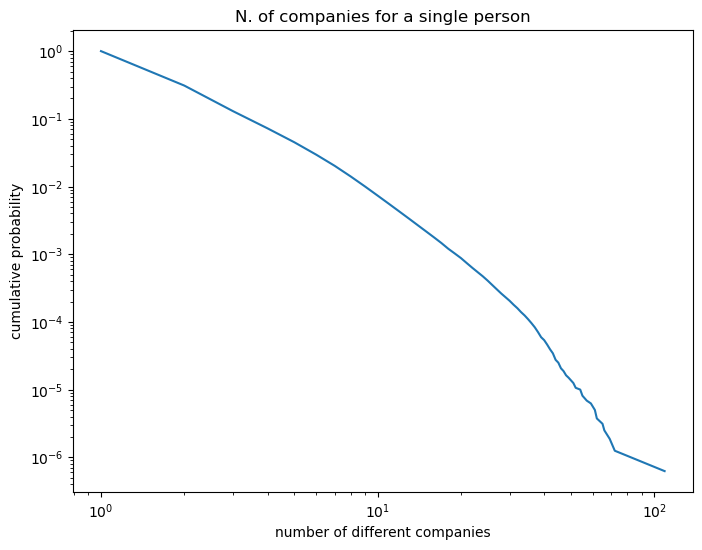

In [17]:
fig, ax = plt.subplots(figsize = (8, 6))

ax.plot(df_stats_n_companies.index, df_stats_n_companies['cumul_probability'])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('number of different companies')
ax.set_ylabel('cumulative probability')
ax.set_title('N. of companies for a single person')

plt.show()

# Settori di mercato

In [18]:
%%time
df_stats_organizations = (df_organizations
                          #.loc[:10]
                          .loc[~df_organizations['category_groups_list'].isna(), ['uuid', 'name', 'city', 'country_code', 'area', 'category_groups_list']]
                          .rename(columns = {'country_code': 'country'}))
df_dummy = df_stats_organizations['category_groups_list'].str.get_dummies(sep = ',')
cols_categories = df_dummy.columns
df_stats_organizations = pd.merge(
    df_stats_organizations.drop('category_groups_list', axis = 1),
    df_dummy,
    left_index = True, right_index = True
)

CPU times: user 23.4 s, sys: 3.39 s, total: 26.8 s
Wall time: 27.9 s


In [19]:
print(f'Organizations in database: {df_organizations.shape[0]}')
print(f'Organizations with info about category: {df_stats_organizations.shape[0]}')

Organizations in database: 3090736
Organizations with info about category: 2904452


In [20]:
df_stats_organizations.head(5)

,uuid,name,city,country,area,Administrative Services,Advertising,Agriculture and Farming,Apps,Artificial Intelligence,...,Professional Services,Real Estate,Sales and Marketing,Science and Engineering,Software,Sports,Sustainability,Transportation,Travel and Tourism,Video
0,e1393508-30ea-8a36-3f96-dd3226033abd,Wetpaint,New York,USA,USA,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,Pleasanton,USA,USA,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,5f2b40b8-d1b3-d323-d81a-b7a8e89553d0,Digg,New York,USA,USA,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,f4d5ab44-058b-298b-ea81-380e6e9a8eec,Omidyar Network,Redwood City,USA,USA,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,Menlo Park,USA,USA,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


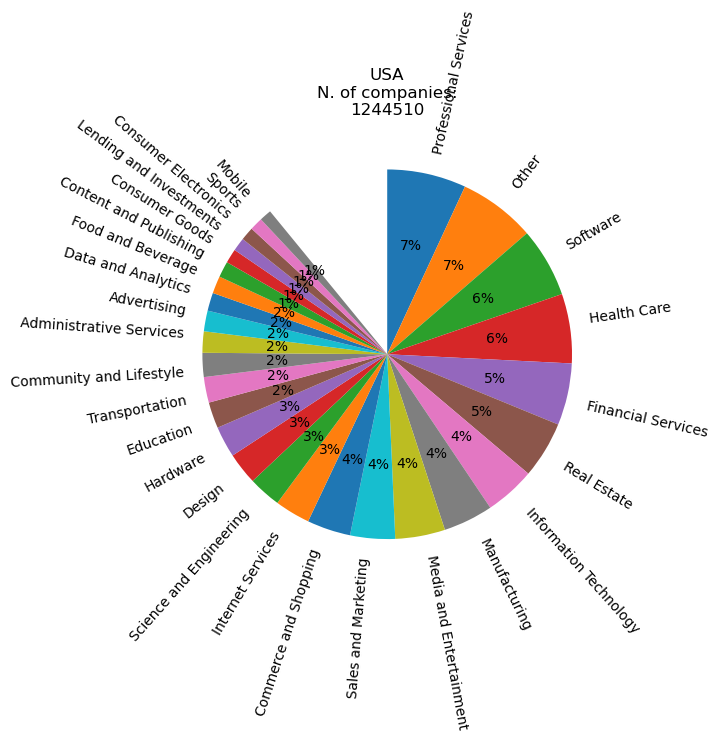

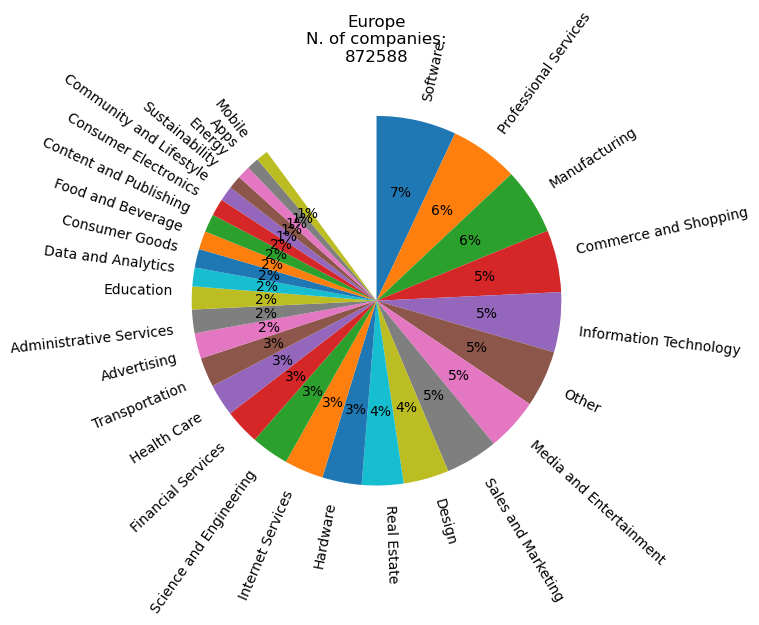

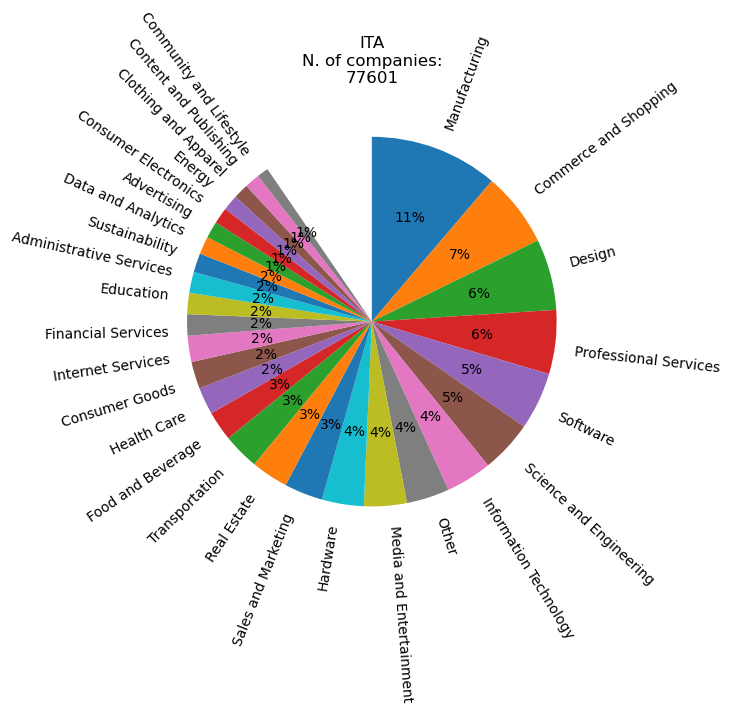

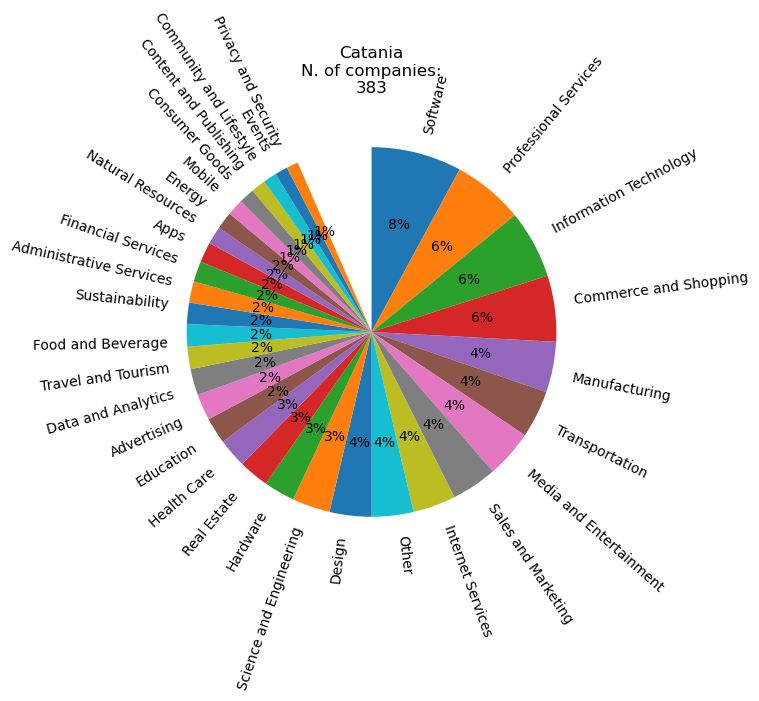

In [21]:
for col, val in [('area', 'USA'), ('area', 'Europe'), ('country', 'ITA'), ('city', 'Catania')]:
    df_stats_final = pd.DataFrame(
        df_stats_organizations
        .loc[df_stats_organizations[col] == val, cols_categories]
        .sum(), columns = ['number']
    )
    df_stats_final.sort_values('number', ascending = False, inplace = True)
    df_stats_final['fraction'] = df_stats_final['number'] / df_stats_final['number'].sum()

    fig, ax = plt.subplots(figsize = (8, 6))

    data_to_plot = df_stats_final[df_stats_final['fraction'] > 0.01]

    ax.pie(
        data_to_plot['fraction'],
        labels = data_to_plot.index,
        startangle = 90,
        counterclock = False,
        rotatelabels = True,
        autopct = lambda x: f'{x:.0f}%',
        normalize = False
    )
    ax.set_title(f'{val}\nN. of companies:\n{(df_stats_organizations[col] == val).sum()}')

    plt.show()